**T-Series YouTube Channel Analysis**

In this project, we will be conducting a comprehensive analysis(tilte) of the T-Series YouTube channel.


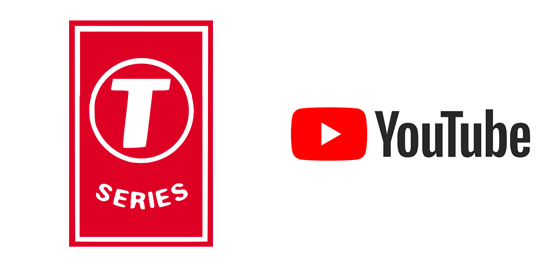

In [226]:
from IPython.display import Image, display
image_path = '/content/YT img.jpeg'
display(Image(filename=image_path))

In [1]:
# importing required libraries

import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# **Data Importing**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel("/content/drive/MyDrive/Datasets/YT_Tseries.xlsx")

In [21]:
df.head(2)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,F44TK5EHCRo,T-Series,RAFTA RAFTA (Lo-Fi Mix) | Dj Moody | KK | Jeet...,"Presenting the song ""RAFTA RAFTA (Lo-Fi Mix)"" ...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20 12:30:08+00:00,7299,241,0,59,PT4M42S,hd,False
1,adx8Rsjp-c0,T-Series,"TUM HO MERA PYAR (Lo-Fi Mix) | Dj Moody | KK, ...","Presenting the song ""TUM HO MERA PYAR (Lo-Fi M...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20 10:30:01+00:00,4212,144,0,32,PT5M27S,hd,False


# **Data Exploration**

In [6]:
df.drop(columns = ["Unnamed: 0"], inplace =True)  # dropping column

In [7]:
df.shape # total records and columns

(19345, 13)

In [8]:
df.isnull().sum() # checking for missing values

video_id         0
channelTitle     0
title            0
description      3
tags             0
publishedAt      0
viewCount        0
likeCount        0
favoriteCount    0
commentCount     0
duration         0
definition       0
caption          0
dtype: int64

In [9]:
df.duplicated().sum()   # checking for duplicated values

0

In [10]:
df.info()   # summary of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19345 entries, 0 to 19344
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       19345 non-null  object
 1   channelTitle   19345 non-null  object
 2   title          19345 non-null  object
 3   description    19342 non-null  object
 4   tags           19345 non-null  object
 5   publishedAt    19345 non-null  object
 6   viewCount      19345 non-null  int64 
 7   likeCount      19345 non-null  int64 
 8   favoriteCount  19345 non-null  int64 
 9   commentCount   19345 non-null  int64 
 10  duration       19345 non-null  object
 11  definition     19345 non-null  object
 12  caption        19345 non-null  bool  
dtypes: bool(1), int64(4), object(8)
memory usage: 1.8+ MB


In [12]:
# statistical summary of data

df.describe()

,viewCount,likeCount,favoriteCount,commentCount
count,1.934500e+04,1.934500e+04,19345.0,19345.000000
mean,1.193826e+07,8.718149e+04,0.0,2636.024141
std,5.484973e+07,3.610099e+05,0.0,12487.178242
min,0.000000e+00,0.000000e+00,0.0,0.000000
25%,8.044200e+04,6.440000e+02,0.0,37.000000
50%,3.627810e+05,3.929000e+03,0.0,184.000000
75%,2.613386e+06,2.580300e+04,0.0,961.000000
max,1.536719e+09,1.284022e+07,0.0,420375.000000


In [11]:
# changing the datatype of publishedAt column

df["publishedAt"] = pd.to_datetime(df["publishedAt"])

# **EDA (Explorartory Data Analysis)**

In [23]:
#Extracting Required columns

df = df[["video_id","title","publishedAt","viewCount","duration"]]

In [24]:
df.head(2)

,video_id,title,publishedAt,viewCount,duration
0,F44TK5EHCRo,RAFTA RAFTA (Lo-Fi Mix) | Dj Moody | KK | Jeet...,2023-08-20 12:30:08+00:00,7299,PT4M42S
1,adx8Rsjp-c0,"TUM HO MERA PYAR (Lo-Fi Mix) | Dj Moody | KK, ...",2023-08-20 10:30:01+00:00,4212,PT5M27S


In [25]:
# converation of duration into duration_seconds

!pip install isodate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.0 MB/s eta 0:00:00


In [26]:
# renaming column name

df.rename(columns={"duration": "duration_seconds"}, inplace=True)


In [28]:
from isodate import parse_duration

df['duration_seconds'] = df['duration_seconds'].apply(lambda x: parse_duration(x))

df['duration_seconds'] = df['duration_seconds'].astype("timedelta64[s]")  #changing the datatype


In [29]:
df.head(2)

,video_id,title,publishedAt,viewCount,duration_seconds
0,F44TK5EHCRo,RAFTA RAFTA (Lo-Fi Mix) | Dj Moody | KK | Jeet...,2023-08-20 12:30:08+00:00,7299,282.0
1,adx8Rsjp-c0,"TUM HO MERA PYAR (Lo-Fi Mix) | Dj Moody | KK, ...",2023-08-20 10:30:01+00:00,4212,327.0


**Number of charaters in title & number of words in title**

In [30]:
# Number of characters

df["num_char"] =  df['title'].apply(len)

In [51]:
# Number of words

import re

# function to count the numbers of words in video title

def count_words(title):
    x = re.sub(r'[0-9:|-]', '', title)  # Removing  numbers, colons, pipes and hypens
    words = x.split()
    return len(words)

df['num_words'] = df['title'].apply(count_words)


In [55]:
# number words in uppercase

df['num_uppercase_word'] = df['title'].apply(lambda x : len([word for word in x.split() if word.isupper()]))

In [56]:
# number of words in lowercase

df['num_lowercase_word'] = df['title'].apply(lambda x: len([word for word in x.split() if word.islower()]))

**Stopwords in Title**

In [64]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords') # getting the stopwords dataset

stop_words = set(stopwords.words('english')) # creating a set of stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [65]:
# Function to count stopwords in a title

def count_stopwords(title):
    words = title.split()
    num_stopwords = sum(1 for word in words if word.lower() in stop_words)
    return num_stopwords

# Apply the function to the 'title' column

df['num_stopwords'] = df['title'].apply(count_stopwords)

In [85]:
# digits in title (1,0)

df['contain_digits'] = df['title'].str.contains(r'\d', regex=True).astype(int)

 **Sentiment Analysis**

In [87]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity


df['title_sentiment'] = df['title'].apply(get_sentiment) # new column


In [96]:
df.sample(2)

,video_id,title,publishedAt,viewCount,duration_seconds,num_char,num_words,num_uppercase_word,num_lowercase_word,num_stopwords,contain_digits,title_sentiment
9155,e9bFu-ZdEAI,Move Your Lakk With Sonakshi Sinha | Latest H...,2017-06-01 15:00:06+00:00,471089,2171.0,91,13,0,0,2,1,0.318182
7449,vaTqx4mAnHM,Dialogue Promo 6: Satyameva Jayate | John Abra...,2018-08-12 13:21:13+00:00,170038,10.0,95,13,0,0,1,1,0.000000


# **VISUALIZATION**

# **Q) Distribution of Variables**

**1) Distribution of Video Title Length**

In [176]:
sns.set(style="dark")  # Set the style


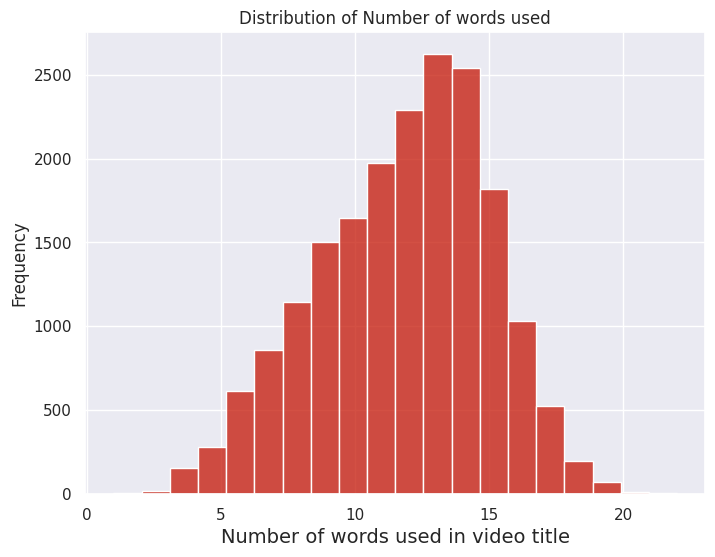

In [220]:
# Plotting histogram

plt.figure(figsize=(8, 6))

sns.histplot(data=df, x='num_words', bins=20, color='#C51605')

plt.title('Distribution of Number of words used')  #title
plt.xlabel('Number of words used in video title' , fontsize = 14) #X-axis
plt.ylabel('Frequency') #Y-axis

plt.grid()
plt.show()

**2) Distirbution of Video Duration in Seconds**

Conclusion :

- The majority of videos in the dataset have a duration ranging from 0 to 250 seconds (4 minutes).
- The distribution is right-skewed, indicating that there are more shorter videos compared to longer ones.
- As the video duration increases, the frequency of videos decreases, suggesting that there are fewer longer videos.

In [143]:
temp_df = df[df["duration_seconds"] < 3500]

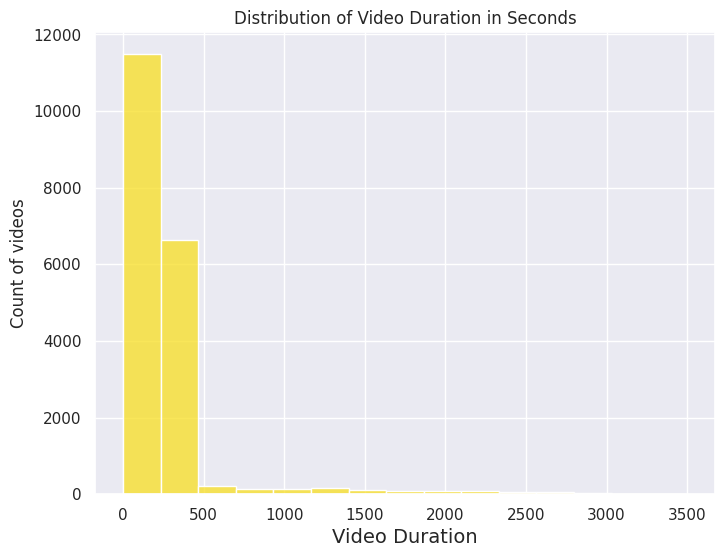

In [184]:
# Plotting histogram

plt.figure(figsize=(8, 6))

sns.histplot(data=temp_df , x='duration_seconds', bins = 15,color='#F8DE22')

plt.title('Distribution of Video Duration in Seconds') #title
plt.xlabel('Video Duration' , fontsize = 14) #X-axis
plt.ylabel('Count of videos') #Y-axis

plt.grid()
plt.show()

**3. Distirbution of Total Views (in Millions)**

  **Conclusion** :

  - Most of the videos in the dataset have view counts ranging from 0 to 1 million views.
  - As the view count increases, the frequency of videos decreases, indicating that there are fewer videos with extremely high view counts.
  - The distribution is skewed to the right, suggesting that the majority of videos have relatively low view counts, while a smaller portion of videos have higher view counts.

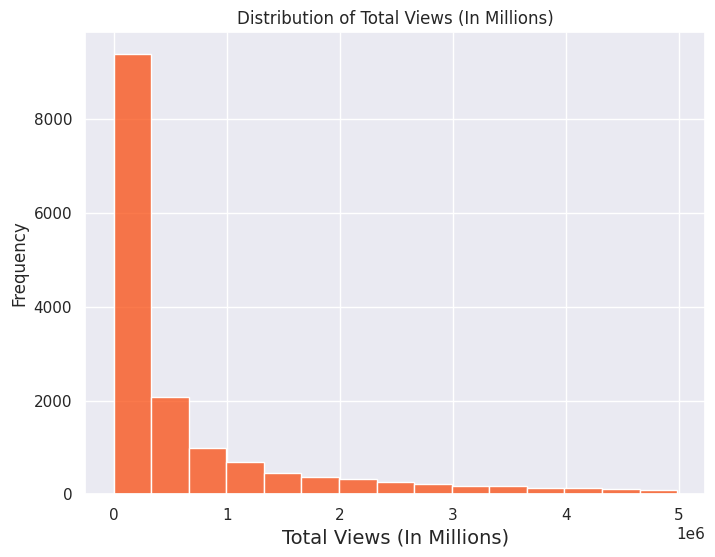

In [183]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df[df['viewCount'] < 5000000] , x='viewCount', bins = 15,color='#F94C10')

plt.title('Distribution of Total Views (In Millions)')  #title
plt.xlabel('Total Views (In Millions)' , fontsize = 14) #X-axis
plt.ylabel('Frequency')#Y-axis

plt.grid()
plt.show()

# **Q) Variable Relations with Total Views**

**1.  Total Views by Video title Lenght**

  **Conclusion** :

  There is no clear linear correlation between title length and view count. Videos with varying title lengths have a wide range of view counts.
  While there are videos with shorter titles that have high view counts, the same is true for videos with longer titles

In [164]:
df["viewCount"].max()  #max viewcount value

1536719459

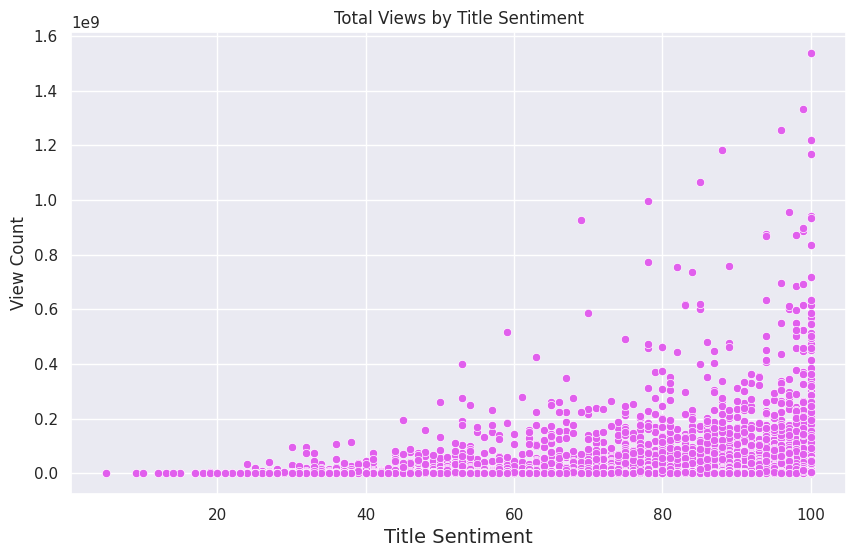

In [224]:
plt.figure(figsize = (10,6))

sns.scatterplot(data = df[df["viewCount"] < 1600000000] , x = "num_char" , y = "viewCount", color = "#E15FED")

plt.title('Total Views by Title Sentiment')
plt.xlabel('Title Sentiment' , fontsize = 14)
plt.ylabel('View Count')

plt.grid()
plt.show()

**2) Total Views by Video Title Sentiment**

  **Conclusion** :

  - The majority of videos exhibit a neutral sentiment (title sentiment value around 0). This aligns with the previous observation that neutral sentiment titles are quite common.
  - There is a spread of videos with positive sentiment values (between 0 and 0.5) that have varying view counts. This suggests that some videos with more positive or upbeat titles may attract higher view counts.
  - Similarly, there are videos with negative sentiment values (below 0), but their view counts are relatively lower. This could indicate that videos with negative sentiment titles might not be as engaging for viewers.

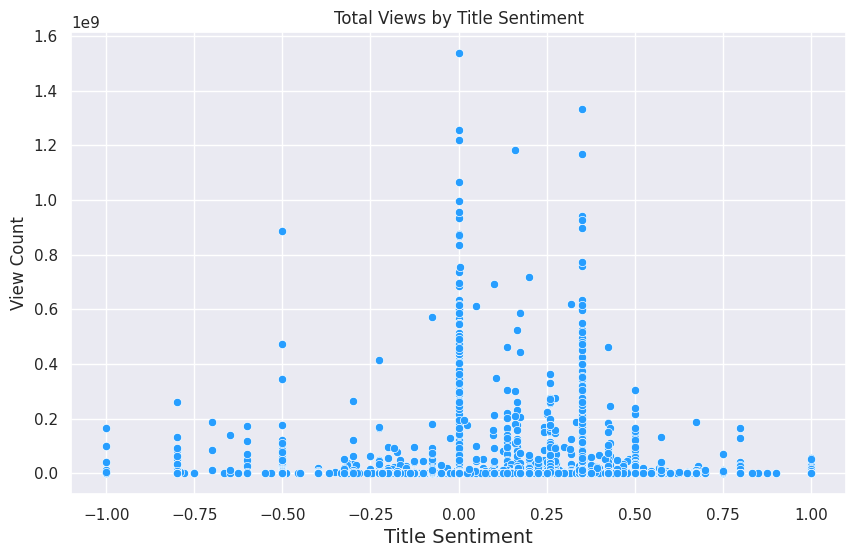

In [180]:
plt.figure(figsize = (10,6))

sns.scatterplot(data = df[df["viewCount"] < 1800000000] , x = "title_sentiment" , y = "viewCount", color = "#279EFF")

plt.title('Total Views by Title Sentiment')
plt.xlabel('Title Sentiment' , fontsize = 14)
plt.ylabel('View Count')

plt.grid()
plt.show()

**3. Title Sentiment Distirbution**

  **Conclusion :**

  - The distribution of video title sentiment shows that a significant portion of video titles have a sentiment value of 0, indicating a neutral sentiment. This suggests that many video titles aim to present information in a balanced and objective manner.
  - There are some video titles with a sentiment value of around 0.5, indicating a slightly positive sentiment. This could suggest that certain video titles are designed to evoke a more positive emotional response from viewers.
  - Relatively fewer video titles have sentiment values below 0.0, indicating that negative sentiment titles are less common in the dataset.

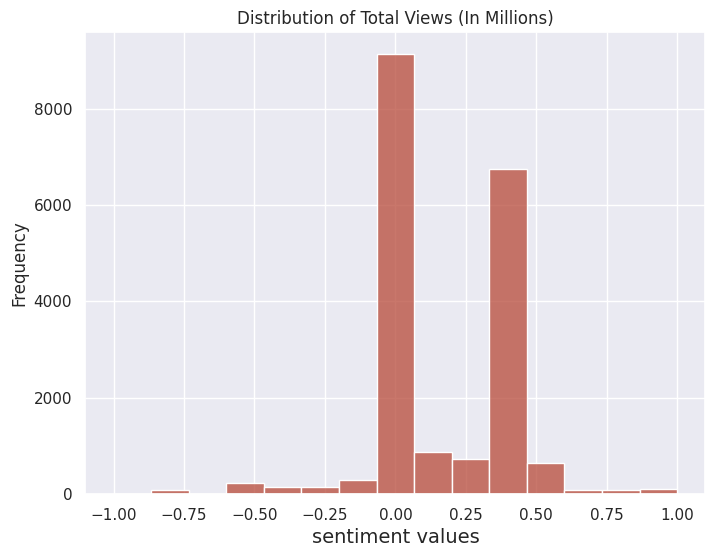

In [187]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df , x='title_sentiment', bins = 15,color='#B84A39')

plt.title('Distribution of video Title Sentiment')
plt.xlabel('sentiment values' , fontsize = 14)
plt.ylabel('Frequency')

plt.grid()
plt.show()

**4. Average Views by Number of Words Used**

  **Conclusion** :

  The average view count of videos tends to vary based on the number of words used in their titles. Titles with around 21 words appear to have the highest average view count. This suggests that video titles with a specific length, in this case, 21 words, might be particularly engaging to viewers.

In [194]:
avg_views = df[df["viewCount"] < 1600000000].groupby("num_words").agg({"viewCount" : "mean"}).reset_index()

avg_views.head()

,num_words,viewCount
0,1,5.678300e+04
1,2,3.313100e+04
2,3,1.776969e+05
3,4,8.128403e+05
4,5,2.046053e+06


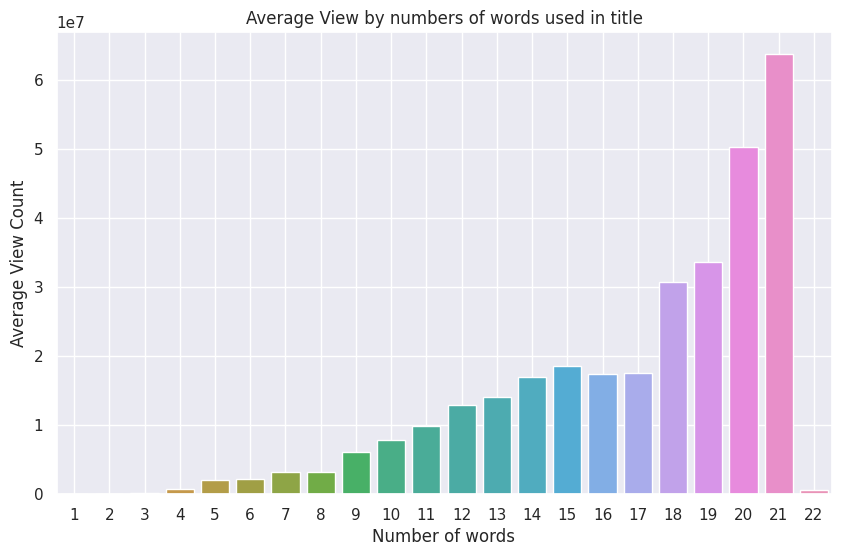

In [225]:
plt.figure(figsize = (10,6))

sns.barplot(data = avg_views , x = "num_words", y = "viewCount" )

plt.title("Average View by numbers of words used in title")
plt.xlabel("Number of words")
plt.ylabel("Average View Count")

plt.grid()
plt.show()


**5. Does using a number in title to more views?**

  **Conclusion**:

  Titles without digits (0) tend to garner more views compared to titles containing digits (1). This suggests that video titles without digits may have a stronger appeal to viewers, contributing to higher average view counts.

In [207]:
temp_df2 = df[df["viewCount"] < 1600000000].groupby("contain_digits").agg({"viewCount" : "mean"}).reset_index()

temp_df2.head()

,contain_digits,viewCount
0,0,1.263542e+07
1,1,9.499009e+06


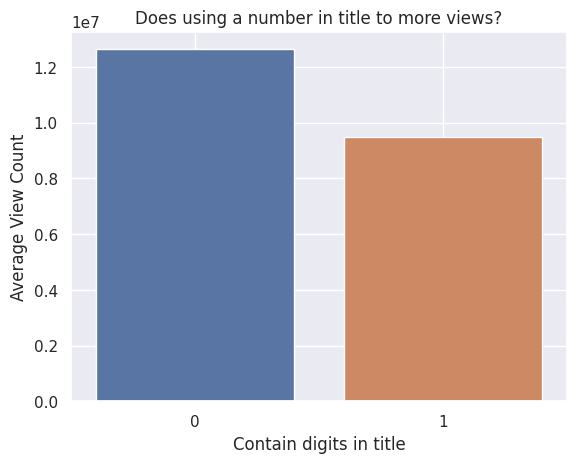

In [211]:

sns.barplot(data = temp_df2 , x = "contain_digits" , y = "viewCount")

plt.title("Does using a number in title to more views")
plt.xlabel("Contain digits in title")
plt.ylabel("Average View Count")

plt.grid()
plt.show()

**6. Does using uppercase words leads to more views?**

  **Conclusion** :

  The analysis reveals a key insight: video titles with around 7 words in uppercase exhibit the highest average view count. This optimal use of uppercase words suggests a potential strategy for increasing viewer engagement.

In [213]:
temp_df3 = df[df["viewCount"] < 1600000000].groupby("num_uppercase_word").agg({"viewCount" : "mean"}).reset_index()

temp_df3.head()

,num_uppercase_word,viewCount
0,0,9.336623e+06
1,1,1.213544e+07
2,2,1.561696e+07
3,3,1.536226e+07
4,4,2.251629e+07


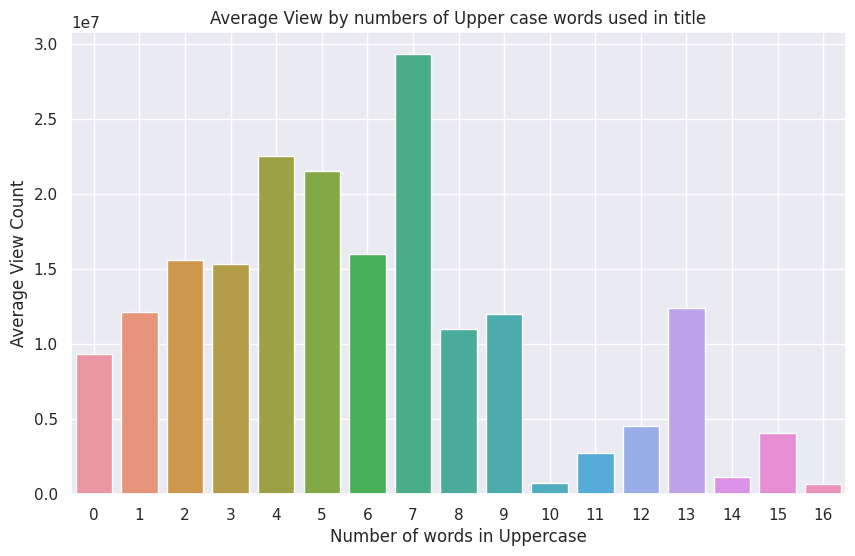

In [214]:
plt.figure(figsize = (10,6))

sns.barplot(data = temp_df3 , x = "num_uppercase_word", y = "viewCount" )

plt.title("Average View by numbers of Upper case words used in title")
plt.xlabel("Number of words in Uppercase")
plt.ylabel("Average View Count")

plt.grid()
plt.show()

# **Q) Video Correlation**

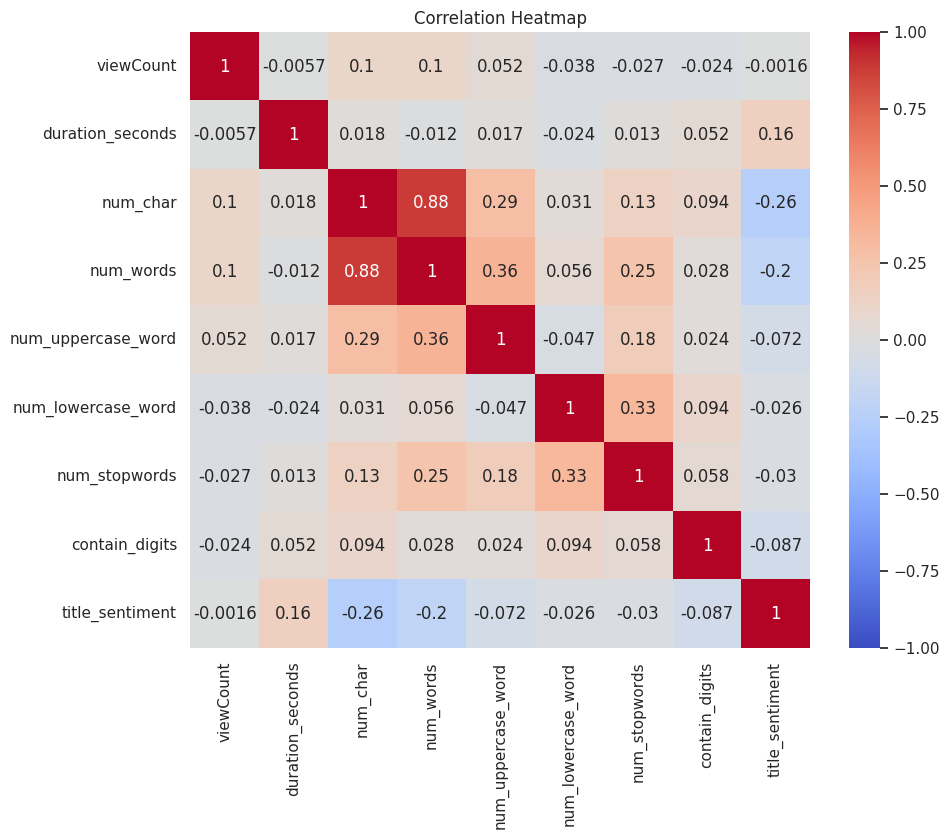

In [218]:
plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Heatmap')

plt.show()